In [1]:
import pandas as pd
import glob
from datetime import datetime, timedelta

In [3]:
labels = pd.read_csv("/media/chan/backup_SSD2/ASPED.c/Session_02152024/IntersectionD/Labels/02-15-camD.csv")

print(labels.shape)
labels.head()

(129081, 34)


,timestamp,frame,recorder1_1m,recorder2_1m,recorder3_1m,recorder4_1m,recorder1_3m,recorder2_3m,recorder3_3m,recorder4_3m,...,view_recorder3_3m,view_recorder4_3m,view_recorder1_6m,view_recorder2_6m,view_recorder3_6m,view_recorder4_6m,view_recorder1_9m,view_recorder2_9m,view_recorder3_9m,view_recorder4_9m
0,2024-02-15 12:07:29,0,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2024-02-15 12:07:30,1,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2024-02-15 12:07:31,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2024-02-15 12:07:32,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2024-02-15 12:07:33,4,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
import pandas as pd
import glob
import os

folder_path = "/home/schivilkar/dev/final_video_processing/Session_02152024/IntersectionD/FinalFLows" 
file_list = sorted(glob.glob(os.path.join(folder_path, "GH*full_pedestrian_flow.csv")))

dfs = []

# Iterate over the files
for idx, file in enumerate(file_list):
    df = pd.read_csv(file)
    
    # Remove the first 40 rows only for the first file
    if idx == 0:
        df = df.iloc[11:]
    
    dfs.append(df)

# Concatenate all DataFrames
merged_df = pd.concat(dfs, ignore_index=True)

merged_df.to_csv(os.path.join(folder_path, "merged_pedestrian_flow.csv"), index=False)

# Display the first few rows
print(merged_df.head())
print(merged_df.shape)


   Frame  Total_Detections  Total_Tracked  Zone_A_Count  Zone_D_Count  \
0     12                 4              7             3             0   
1     13                 5              8             3             0   
2     14                 0              8             3             0   
3     15                 0              8             3             0   
4     16                 0              7             2             0   

   Zone_C_Count  Zone_E_Count  A_to_D  A_to_C  A_to_E  ...  Total_A_to_E  \
0             0             1       0       0       0  ...             0   
1             1             0       0       0       0  ...             0   
2             1             0       0       0       0  ...             0   
3             1             0       0       0       0  ...             0   
4             1             0       0       0       0  ...             0   

   Total_D_to_A  Total_D_to_C  Total_D_to_E  Total_C_to_A  Total_C_to_D  \
0             0             0

In [7]:
#129092 - in D
#129081 - in count

merged_df.columns

Index(['Frame', 'Total_Detections', 'Total_Tracked', 'Zone_A_Count',
       'Zone_D_Count', 'Zone_C_Count', 'Zone_E_Count', 'A_to_D', 'A_to_C',
       'A_to_E', 'D_to_A', 'D_to_C', 'D_to_E', 'C_to_A', 'C_to_D', 'C_to_E',
       'E_to_A', 'E_to_D', 'E_to_C', 'Total_A_to_D', 'Total_A_to_C',
       'Total_A_to_E', 'Total_D_to_A', 'Total_D_to_C', 'Total_D_to_E',
       'Total_C_to_A', 'Total_C_to_D', 'Total_C_to_E', 'Total_E_to_A',
       'Total_E_to_D', 'Total_E_to_C'],
      dtype='object')

In [8]:
flow_last_24_cols = merged_df.iloc[:, -24:]

final_flow = pd.concat([labels, flow_last_24_cols], axis=1)

In [9]:
print(final_flow.head())

             timestamp  frame  recorder1_1m  recorder2_1m  recorder3_1m  \
0  2024-02-15 12:07:29      0             0             0             0   
1  2024-02-15 12:07:30      1             0             0             0   
2  2024-02-15 12:07:31      2             0             0             0   
3  2024-02-15 12:07:32      3             0             0             0   
4  2024-02-15 12:07:33      4             0             0             0   

   recorder4_1m  recorder1_3m  recorder2_3m  recorder3_3m  recorder4_3m  ...  \
0             0             2             0             0             0  ...   
1             0             2             0             0             0  ...   
2             0             0             0             0             0  ...   
3             0             0             0             0             0  ...   
4             0             0             1             0             0  ...   

   Total_A_to_E  Total_D_to_A  Total_D_to_C  Total_D_to_E  Total_C_t

In [10]:
import matplotlib.pyplot as plt

final_flow['timestamp'] = pd.to_datetime(final_flow['timestamp'], format='%Y-%m-%d %H:%M:%S')
final_flow['hour_of_day'] = final_flow['timestamp'].dt.hour

In [11]:
flow_by_hour = final_flow.groupby('hour_of_day').agg({
    'A_to_C': 'sum',
    'C_to_A': 'sum'
}).reset_index()

# Add a column for the total flow
flow_by_hour['Total_FlowAC'] = flow_by_hour['A_to_C'] + flow_by_hour['C_to_A']

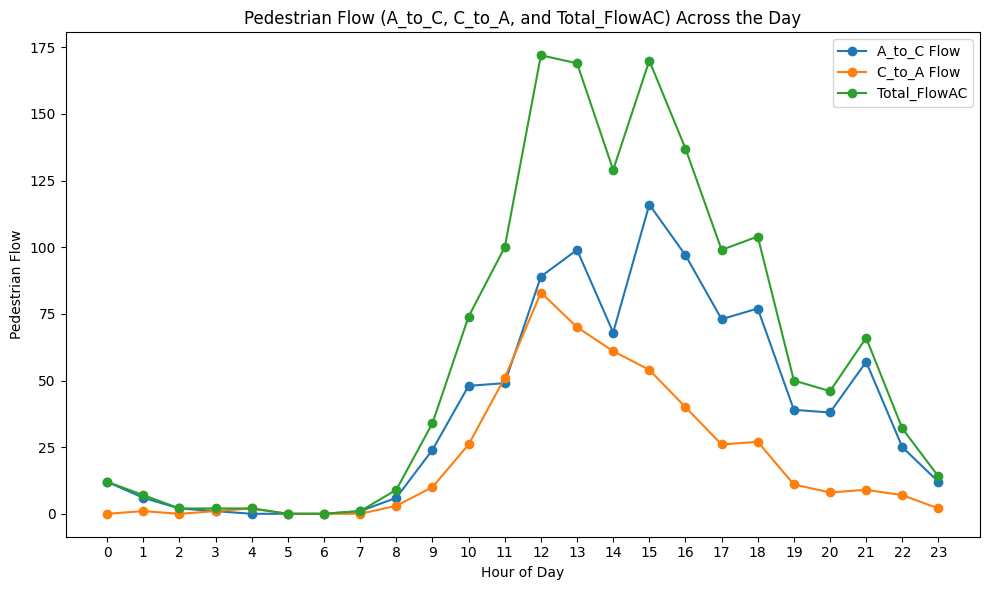

In [12]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(flow_by_hour['hour_of_day'], flow_by_hour['A_to_C'], label='A_to_C Flow', marker='o')
plt.plot(flow_by_hour['hour_of_day'], flow_by_hour['C_to_A'], label='C_to_A Flow', marker='o')
plt.plot(flow_by_hour['hour_of_day'], flow_by_hour['Total_FlowAC'], label='Total_FlowAC', marker='o')

# Add labels and title
plt.xlabel('Hour of Day')
plt.ylabel('Pedestrian Flow')
plt.title('Pedestrian Flow (A_to_C, C_to_A, and Total_FlowAC) Across the Day')
plt.xticks(range(0, 24))  # Set x-axis ticks for each hour (0-23)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

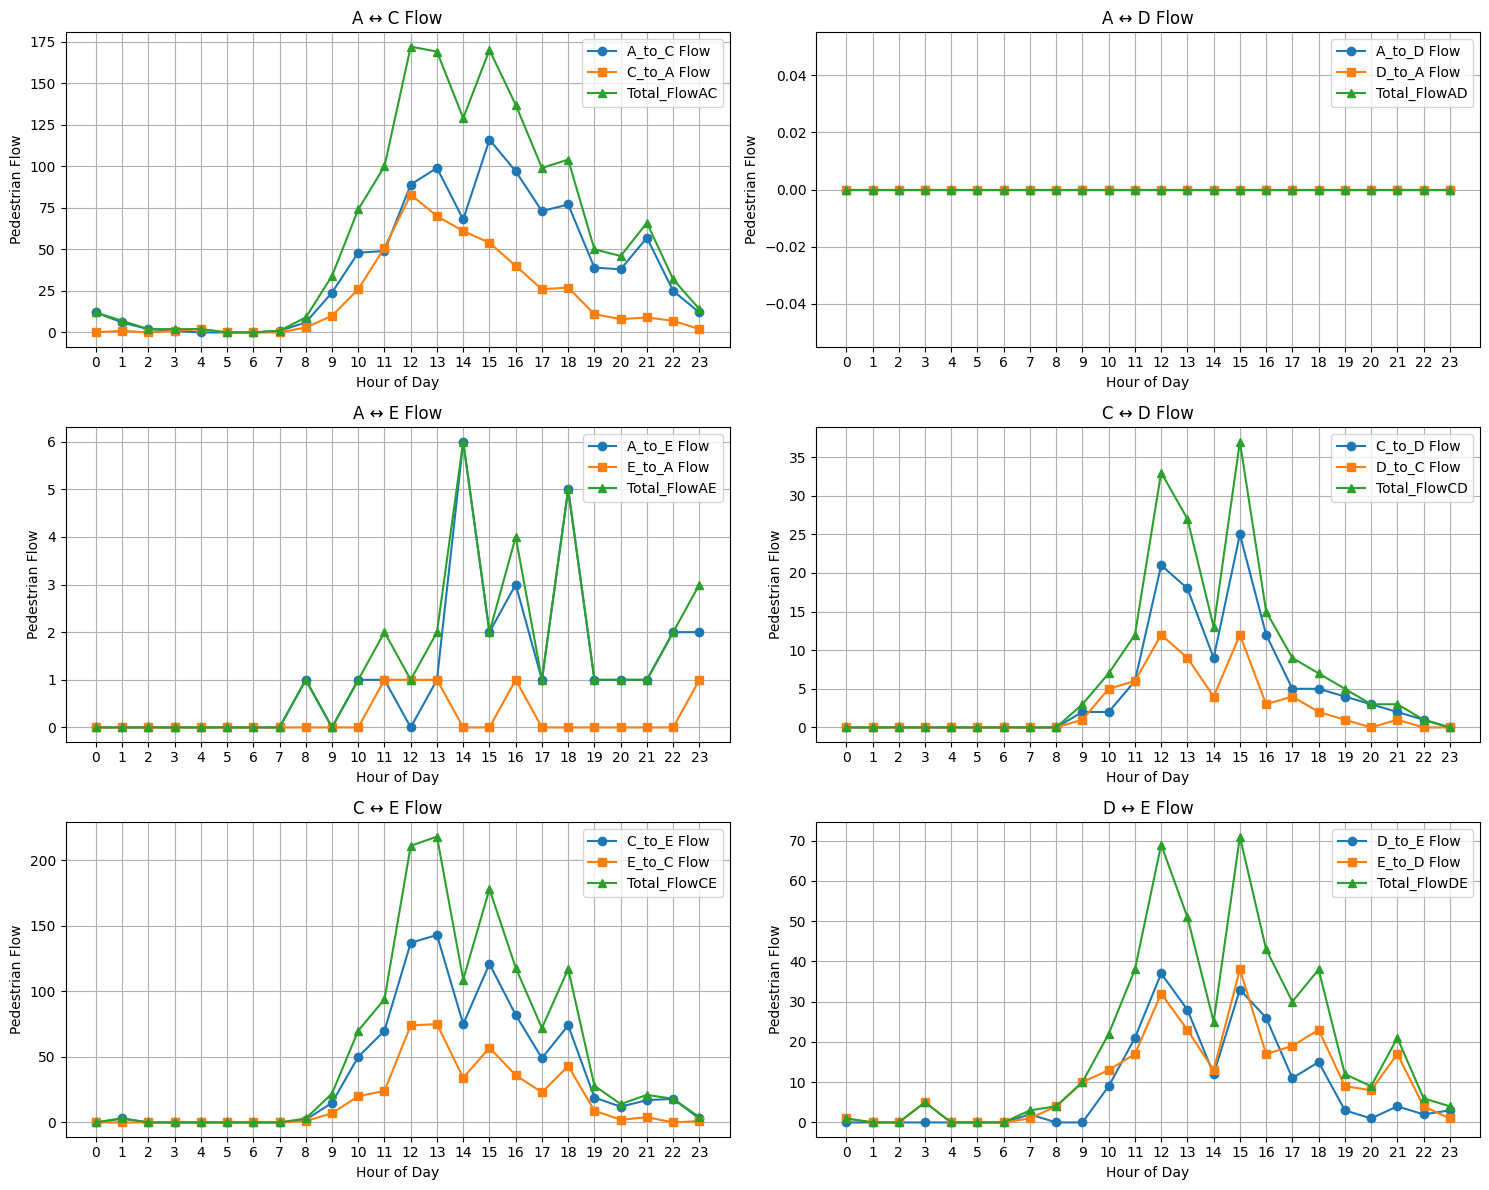

In [13]:
import matplotlib.pyplot as plt

# Group by hour and calculate sums for all selected flow columns
flow_by_hour = final_flow.groupby('hour_of_day').agg({
    'A_to_C': 'sum', 'C_to_A': 'sum', 'A_to_D': 'sum', 'D_to_A': 'sum', 'A_to_E': 'sum', 'E_to_A': 'sum',
    'C_to_D': 'sum', 'D_to_C': 'sum', 'C_to_E': 'sum', 'E_to_C': 'sum', 'D_to_E': 'sum', 'E_to_D': 'sum'
}).reset_index()

# Add total flow columns for different routes
flow_by_hour['Total_FlowAC'] = flow_by_hour['A_to_C'] + flow_by_hour['C_to_A']
flow_by_hour['Total_FlowAD'] = flow_by_hour['A_to_D'] + flow_by_hour['D_to_A']
flow_by_hour['Total_FlowAE'] = flow_by_hour['A_to_E'] + flow_by_hour['E_to_A']
flow_by_hour['Total_FlowCD'] = flow_by_hour['C_to_D'] + flow_by_hour['D_to_C']
flow_by_hour['Total_FlowCE'] = flow_by_hour['C_to_E'] + flow_by_hour['E_to_C']
flow_by_hour['Total_FlowDE'] = flow_by_hour['D_to_E'] + flow_by_hour['E_to_D']

# Create a figure with a grid of 3x2 subplots
fig, axes = plt.subplots(3, 2, figsize=(15, 12))

# Define the flow categories and their subplot positions
flows = [
    ('A_to_C', 'C_to_A', 'Total_FlowAC', 'A ↔ C Flow', axes[0, 0]),
    ('A_to_D', 'D_to_A', 'Total_FlowAD', 'A ↔ D Flow', axes[0, 1]),
    ('A_to_E', 'E_to_A', 'Total_FlowAE', 'A ↔ E Flow', axes[1, 0]),
    ('C_to_D', 'D_to_C', 'Total_FlowCD', 'C ↔ D Flow', axes[1, 1]),
    ('C_to_E', 'E_to_C', 'Total_FlowCE', 'C ↔ E Flow', axes[2, 0]),
    ('D_to_E', 'E_to_D', 'Total_FlowDE', 'D ↔ E Flow', axes[2, 1])
]

# Loop through each flow category and plot it in the respective subplot
for flow1, flow2, total, title, ax in flows:
    ax.plot(flow_by_hour['hour_of_day'], flow_by_hour[flow1], label=f'{flow1} Flow', marker='o')
    ax.plot(flow_by_hour['hour_of_day'], flow_by_hour[flow2], label=f'{flow2} Flow', marker='s')
    ax.plot(flow_by_hour['hour_of_day'], flow_by_hour[total], label=f'{total}', marker='^')

    ax.set_xlabel('Hour of Day')
    ax.set_ylabel('Pedestrian Flow')
    ax.set_title(title)
    ax.set_xticks(range(0, 24))  # Ensure x-axis ticks are set from 0 to 23
    ax.legend()
    ax.grid(True)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


In [14]:
peak_hours = flow_by_hour.set_index("hour_of_day").idxmax()
off_peak_hours = flow_by_hour.set_index("hour_of_day").idxmin()

peak_offpeak_df = pd.DataFrame({
    "Peak Hour": peak_hours,
    "Off-Peak Hour": off_peak_hours
})

# Print the table
print(peak_offpeak_df)


              Peak Hour  Off-Peak Hour
A_to_C               15              4
C_to_A               12              0
A_to_D                0              0
D_to_A                0              0
A_to_E               14              0
E_to_A               11              0
C_to_D               15              0
D_to_C               12              0
C_to_E               13              0
E_to_C               13              0
D_to_E               12              0
E_to_D               15              1
Total_FlowAC         12              5
Total_FlowAD          0              0
Total_FlowAE         14              0
Total_FlowCD         15              0
Total_FlowCE         13              0
Total_FlowDE         15              1


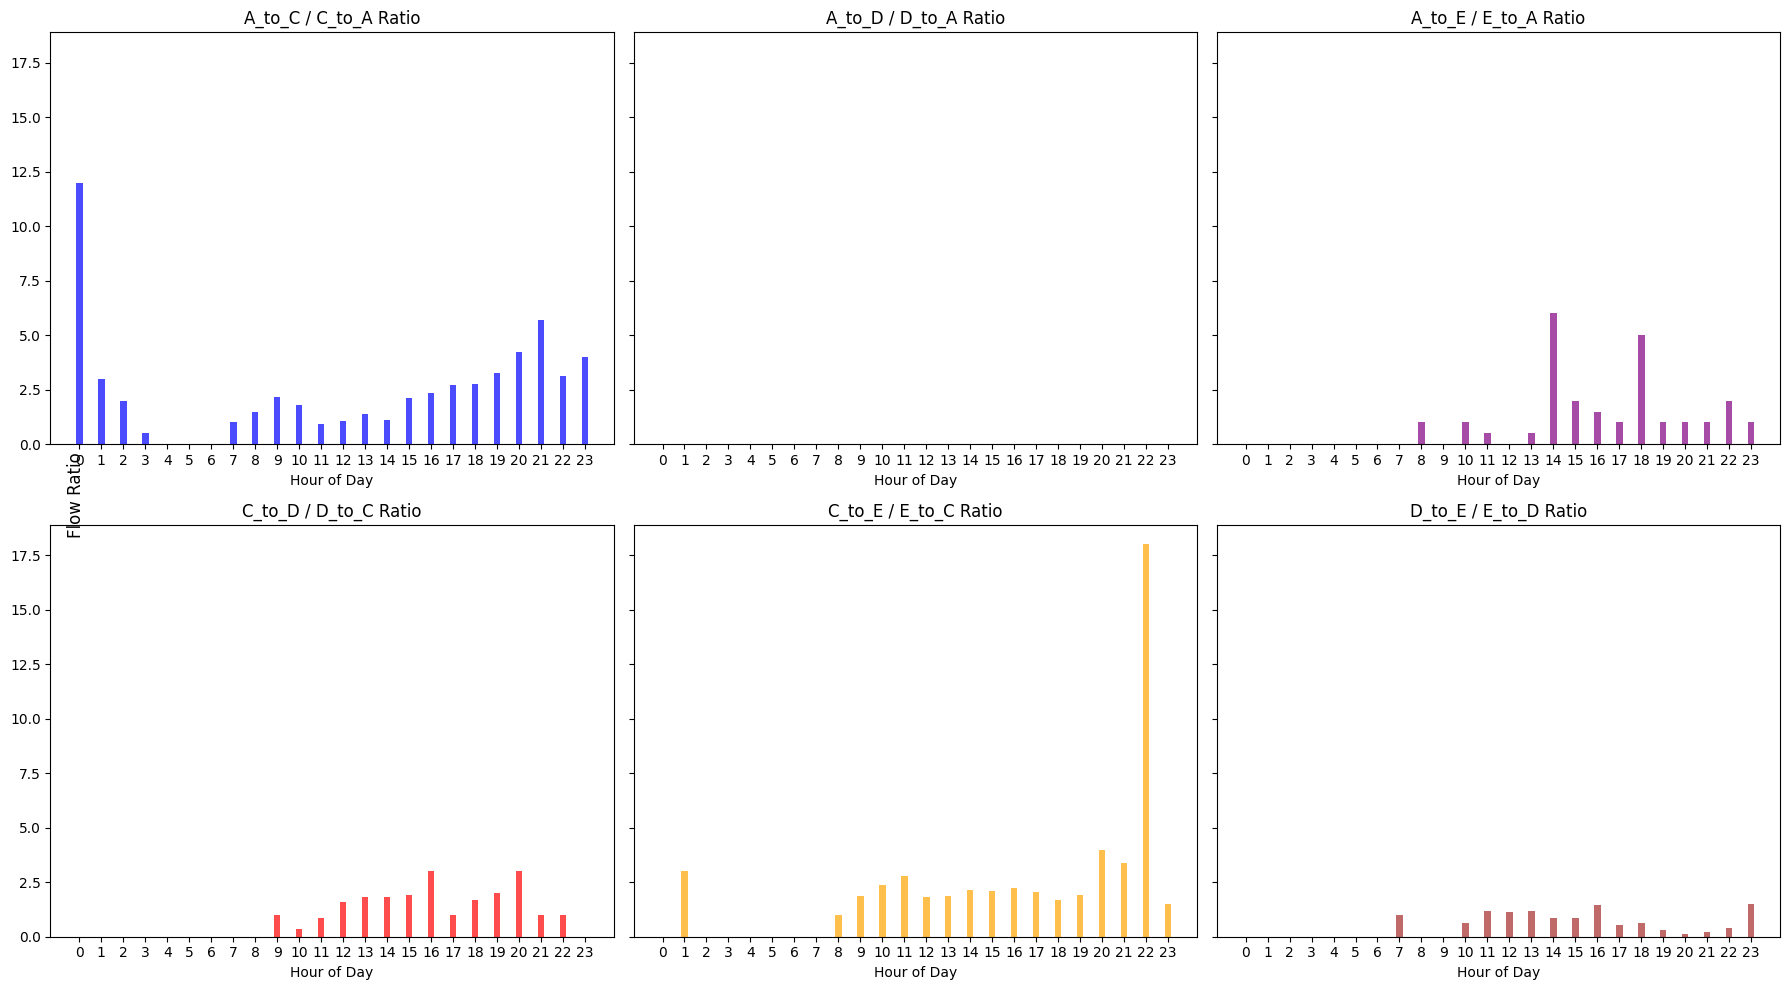

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Compute directional flow ratios while avoiding division by zero
flow_by_hour['AC_ratio'] = flow_by_hour['A_to_C'] / (flow_by_hour['C_to_A'] + 1)
flow_by_hour['AD_ratio'] = flow_by_hour['A_to_D'] / (flow_by_hour['D_to_A'] + 1)
flow_by_hour['AE_ratio'] = flow_by_hour['A_to_E'] / (flow_by_hour['E_to_A'] + 1)
flow_by_hour['CD_ratio'] = flow_by_hour['C_to_D'] / (flow_by_hour['D_to_C'] + 1)
flow_by_hour['CE_ratio'] = flow_by_hour['C_to_E'] / (flow_by_hour['E_to_C'] + 1)
flow_by_hour['DE_ratio'] = flow_by_hour['D_to_E'] / (flow_by_hour['E_to_D'] + 1)

# Set up bar width and positions
x = np.arange(len(flow_by_hour['hour_of_day']))  # X-axis positions
bar_width = 0.3  # Width of bars

# Create a figure with 2 rows and 3 columns (to fit 6 subplots)
fig, axes = plt.subplots(2, 3, figsize=(18, 10), sharey=True)

# Define the ratios and their subplot positions
ratios = [
    ('AC_ratio', 'A_to_C / C_to_A Ratio', axes[0, 0], 'blue'),
    ('AD_ratio', 'A_to_D / D_to_A Ratio', axes[0, 1], 'green'),
    ('AE_ratio', 'A_to_E / E_to_A Ratio', axes[0, 2], 'purple'),
    ('CD_ratio', 'C_to_D / D_to_C Ratio', axes[1, 0], 'red'),
    ('CE_ratio', 'C_to_E / E_to_C Ratio', axes[1, 1], 'orange'),
    ('DE_ratio', 'D_to_E / E_to_D Ratio', axes[1, 2], 'brown')
]

# Loop through each ratio and plot it in the respective subplot
for ratio, title, ax, color in ratios:
    ax.bar(flow_by_hour['hour_of_day'], flow_by_hour[ratio], color=color, alpha=0.7, width=bar_width)
    ax.set_title(title)
    ax.set_xlabel("Hour of Day")
    ax.set_xticks(range(0, 24))  # Ensure hourly ticks

# Set the common y-label
fig.text(0.04, 0.5, 'Flow Ratio', va='center', rotation='vertical', fontsize=12)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


        A_to_D    A_to_C    A_to_E  D_to_A    D_to_C    D_to_E    C_to_A  \
A_to_D     NaN       NaN       NaN     NaN       NaN       NaN       NaN   
A_to_C     NaN  1.000000  0.517631     NaN  0.820285  0.890298  0.853322   
A_to_E     NaN  0.517631  1.000000     NaN  0.167721  0.319297  0.405773   
D_to_A     NaN       NaN       NaN     NaN       NaN       NaN       NaN   
D_to_C     NaN  0.820285  0.167721     NaN  1.000000  0.931525  0.914391   
D_to_E     NaN  0.890298  0.319297     NaN  0.931525  1.000000  0.928809   
C_to_A     NaN  0.853322  0.405773     NaN  0.914391  0.928809  1.000000   
C_to_D     NaN  0.876858  0.279078     NaN  0.933165  0.942015  0.889181   
C_to_E     NaN  0.917464  0.398499     NaN  0.932126  0.965697  0.964268   
E_to_A     NaN  0.421094  0.077444     NaN  0.485674  0.639865  0.587815   
E_to_D     NaN  0.937342  0.363017     NaN  0.891997  0.896704  0.840486   
E_to_C     NaN  0.886488  0.369455     NaN  0.913383  0.945430  0.940307   

          C

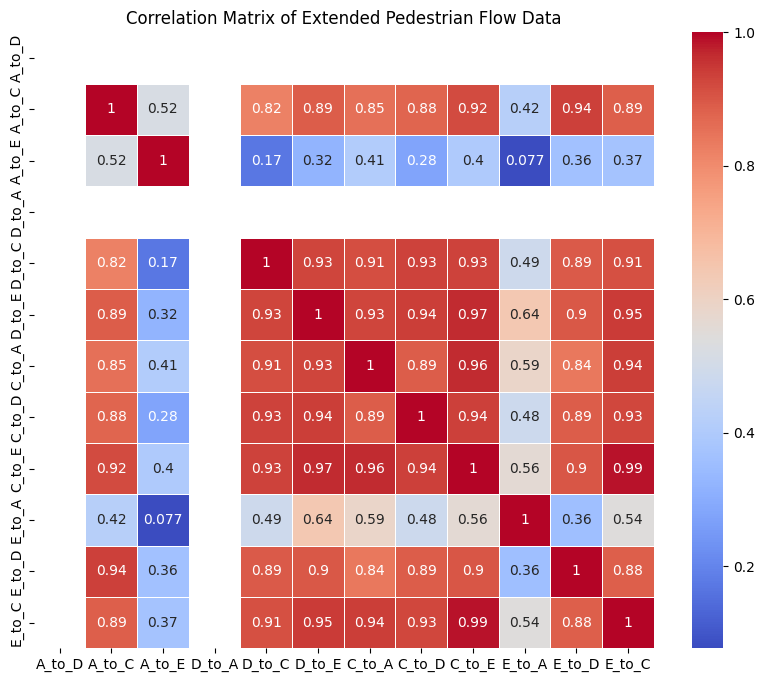

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the selected columns
selected_columns = ['A_to_D', 'A_to_C', 'A_to_E', 
                    'D_to_A', 'D_to_C', 'D_to_E', 
                    'C_to_A', 'C_to_D', 'C_to_E', 
                    'E_to_A', 'E_to_D', 'E_to_C']

# Compute the correlation matrix
correlation_matrix = flow_by_hour[selected_columns].corr()

# Print the correlation matrix
print(correlation_matrix)

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix of Extended Pedestrian Flow Data")
plt.show()
